# ML Powered Applications

# Chapter 4

Data exploration notebook to better understand the data.

Objective
- To label and identify trends

Process
- Generate summary statistics
- Identifying differences in class distributions

In [9]:
# library dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# intialization
PATH_data = r"C:\Users\nrosh\Desktop\Personal Coding Projects\Python\ml-powered-applications\neel\data"

## Statistics Observed

1. Do high scoring questions tend to have longer question lengths?
2. Do high scoring questions tend to be favourited more?
3. Do high scoring questions tend to be closed by the author?
    
Sources:
- stackexchange: 
    - Data Schema: https://meta.stackexchange.com/questions/2677/database-schema-documentation-for-the-public-data-dump-and-sede
    - Score: https://meta.stackexchange.com/questions/229255/what-is-the-score-of-a-post
    

## Functions

## Ingestion


In [2]:
# original
df_orig = pd.read_csv(
    PATH_data + "\\out\questions_answers.csv",
)

# copies
df = df_orig.iloc[:, 1::].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5081 entries, 0 to 5080
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   post_title             5081 non-null   object 
 1   post_question          5081 non-null   object 
 2   post_acceptedanswer    5081 non-null   object 
 3   postcomments_count     5081 non-null   int64  
 4   postanswers_count      5081 non-null   float64
 5   postfavorites_count    2399 non-null   float64
 6   answercomments_count   5081 non-null   int64  
 7   post_score             5081 non-null   int64  
 8   tenure_hours           5081 non-null   float64
 9   question_lastedited    3254 non-null   object 
 10  answer_lastedited      1756 non-null   object 
 11  question_lastactivity  5081 non-null   object 
 12  answer_lastactivity    5081 non-null   object 
 13  post_closed            5081 non-null   int64  
 14  question_edited        5081 non-null   int64  
 15  answ

## Summary Statistics

### 1. Do high scoring questions tend to have longer question lengths?


In [3]:
# initialize features
df["fe_postscore_class"]        = "low"
df["fe_lenpostquestion_class"]  = "short"

# classify questions and high or low length
df["fe_lenpostquestion"]       = df.loc[:, "post_question"].apply(lambda row: len(row))

# feature engineer length and score classes
for index, row in df.iterrows():
    
    # fe_postscore_class
    if row.post_score > df.post_score.median():
        df.loc[index, "fe_postscore_class"] = "high"
        
    # fe_lenpostquestion_class
    if row.fe_lenpostquestion > df.fe_lenpostquestion.median():
        df.loc[index, "fe_lenpostquestion_class"] = "long"

Text(0, 0.5, 'Percentage of sentences')

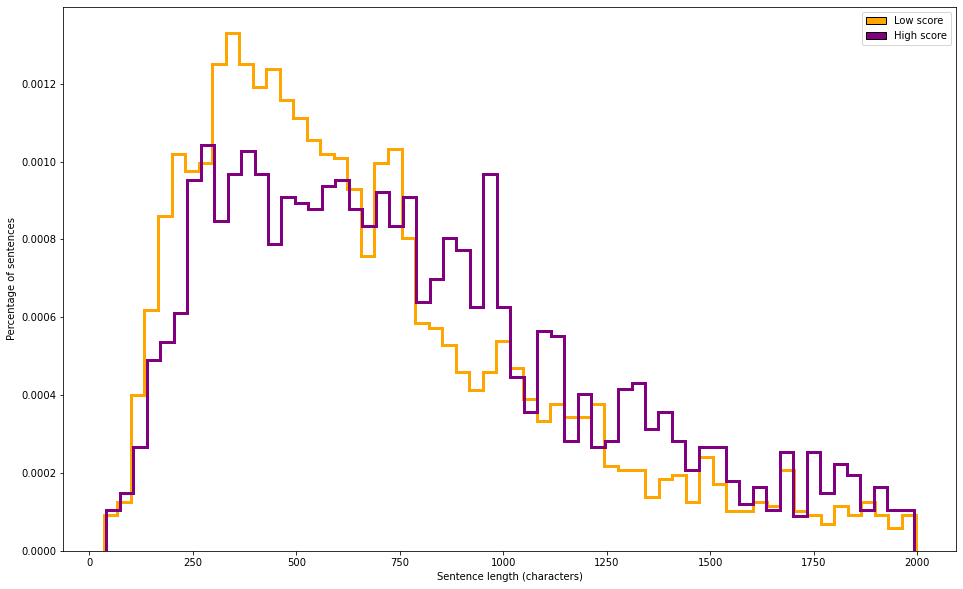

In [12]:
# plot low scoring questions
ax = df.loc[(df.fe_postscore_class == "low") & (df.fe_lenpostquestion < 2000), "fe_lenpostquestion"].hist(
    bins=60,
    density=True,
    histtype="step",
    color="orange",
    linewidth=3,
    grid=False,
    figsize=(16,10)
)

# plot high scoring questions
df.loc[(df.fe_postscore_class == "high") & (df.fe_lenpostquestion < 2000), "fe_lenpostquestion"].hist(
    bins=60,
    density=True,
    histtype="step",
    color="purple",
    linewidth=3,
    grid=False
)

# set figure aesthetics
handles = [
    Rectangle((0, 0), 1, 1, color=c, ec="k") for c in ["orange", "purple"]
]
labels = ["Low score", "High score"]
plt.legend(handles, labels)
ax.set_xlabel("Sentence length (characters)")
ax.set_ylabel("Percentage of sentences")


#### Insights
1. Yes. High scoring questions tends to range greater than 800 words in length

### Do high scoring questions tend to be favourited more?

In [21]:
# initialize features
df["fe_favourite_class"]        = "low"

# feature engineer length and score classes
for index, row in df.iterrows():
    
    # fe_postscore_class
    if row.postfavorites_count > df.postfavorites_count.median():
        df.loc[index, "fe_favourite_class"] = "high"

Text(0, 0.5, 'Percentage of posts')

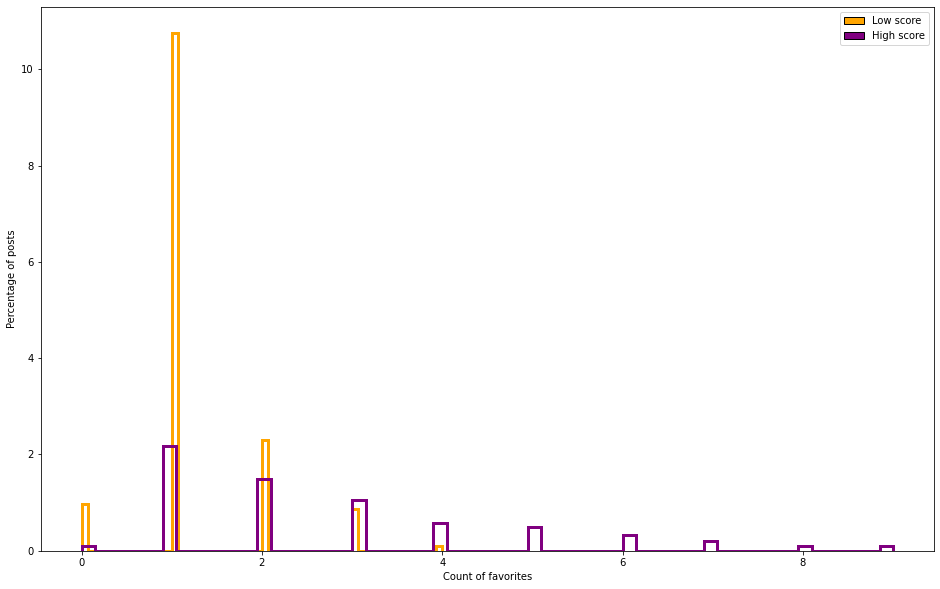

In [26]:
# plot low scoring questions
ax = df.loc[(df.fe_postscore_class == "low") & (df.postfavorites_count < 10), "postfavorites_count"].hist(
    bins=60,
    density=True,
    histtype="step",
    color="orange",
    linewidth=3,
    grid=False,
    figsize=(16,10)
)

# plot high scoring questions
df.loc[(df.fe_postscore_class == "high") & (df.postfavorites_count < 10), "postfavorites_count"].hist(
    bins=60,
    density=True,
    histtype="step",
    color="purple",
    linewidth=3,
    grid=False
)

# set figure aesthetics
handles = [
    Rectangle((0, 0), 1, 1, color=c, ec="k") for c in ["orange", "purple"]
]
labels = ["Low score", "High score"]
plt.legend(handles, labels)
ax.set_xlabel("Count of favorites")
ax.set_ylabel("Percentage of posts")


#### Insights
1. Yes. High scoring questions tend to have more than 3 counts of being favorited

### Do high scoring questions tend to be closed by the author?

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5081 entries, 0 to 5080
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   post_title                5081 non-null   object 
 1   post_question             5081 non-null   object 
 2   post_acceptedanswer       5081 non-null   object 
 3   postcomments_count        5081 non-null   int64  
 4   postanswers_count         5081 non-null   float64
 5   postfavorites_count       2399 non-null   float64
 6   answercomments_count      5081 non-null   int64  
 7   post_score                5081 non-null   int64  
 8   tenure_hours              5081 non-null   float64
 9   question_lastedited       3254 non-null   object 
 10  answer_lastedited         1756 non-null   object 
 11  question_lastactivity     5081 non-null   object 
 12  answer_lastactivity       5081 non-null   object 
 13  post_closed               5081 non-null   int64  
 14  question

In [32]:
df.loc[:, ["fe_postscore_class", "post_closed", "question_edited", "answer_edited"]].groupby("fe_postscore_class").agg({
    "post_closed": np.sum,
    "question_edited": np.sum,
    "answer_edited": np.sum
})

,post_closed,question_edited,answer_edited
fe_postscore_class,,,
high,39,644,1335
low,359,1183,1990


#### Insights
1. No. High scoring questions are not closed as much as low scoring questions. 
    - Their questions and answers are edited less frequently

In [34]:
# export data

df.to_csv(
    PATH_data + "\\out\questions_answers_1.csv",
)